In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

pd.set_option('display.max_columns', 100)

In [2]:
partidas = pd.read_csv('../data/dados_limpos.csv')
partidas.head()

,resultado,AverageGoalsInFavorHomeTeam,AverageGoalsAgainstHomeTeam,AverageGoalsInFavorAwayTeam,AverageGoalsAgainstAwayTeam,HomeWinLastFiveIndice,HomeDrawLastFiveIndice,HomeDefeatLastFiveIndice,AwayWinLastFiveIndice,AwayDrawLastFiveIndice,AwayDefeatLastFiveIndice,AttackStrengthHomeTeam,DefenseStrengthHomeTeam,StrengthHomeTeam,AttackStrengthAwayTeam,DefenseStrengthAwayTeam,StrengthAwayTeam
0,0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.726786,0.404762,1.570667,3.644444,3.640000,3.709000
1,1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.923611,0.798333,2.069333,2.142063,3.721667,2.630071
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.311111,9.140000,4.836333,1.259524,3.100000,1.690714
3,-1,2.0,1.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.638889,2.310000,1.908667,3.969841,6.170000,4.867487
4,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.820833,6.485714,4.081238,1.616667,3.551667,2.273000


In [3]:
partidas.shape

(1477, 17)

In [4]:
def fazNormalizacao(partidas):
    partidas_normalizadas = preprocessing.MaxAbsScaler().fit_transform(partidas)
    return pd.DataFrame(partidas_normalizadas, columns = partidas.columns)

In [5]:
def realizaSorteioDosDados(treino, teste):    
    return train_test_split(treino, teste, test_size=0.3,stratify=teste)

def separaCarasteristicasEClasse(partidas):
    gols = ['AverageGoalsInFavorHomeTeam','AverageGoalsAgainstHomeTeam','AverageGoalsInFavorAwayTeam','AverageGoalsAgainstAwayTeam']
    indices = ['HomeWinLastFiveIndice','HomeDrawLastFiveIndice','HomeDefeatLastFiveIndice','AwayWinLastFiveIndice','AwayDrawLastFiveIndice','AwayDefeatLastFiveIndice']
    forcas = ['AttackStrengthHomeTeam','DefenseStrengthHomeTeam','StrengthHomeTeam','AttackStrengthAwayTeam','DefenseStrengthAwayTeam','StrengthAwayTeam']
    valores =['AttackValueHomeTeam','DefenseValueHomeTeam','ValueHomeTeam','AttackValueAwayTeam','DefenseValueAwayTeam','ValueAwayTeam']
    caracteristicas = partidas[partidas.columns.difference(['resultado'])]
    classe = partidas['resultado']
    return caracteristicas, classe

In [6]:
def numToLabel(num):
    if (num==-1):
        return 'Derrota'
    elif (num==0):
        return 'Empate'
    else :
        return 'Vitória'
    
def plot_confusion_matrix(y_true, y_pred, classes,
                          title,
                          normalize=True,
                          cmap=plt.cm.Blues):
    
    y_true = list(map(lambda x: numToLabel(x),y_true))
    y_pred = list(map(lambda x: numToLabel(x), y_pred))
    classes = list(map(lambda x: numToLabel(x), classes))
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred,labels=classes)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm*100
    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Resultados reais',
           xlabel='Resultados preditos')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.savefig('samplefigure', bbox_inches='tight')
    return ax

In [7]:
def classificadorGenerico(modelo, caracteristicasTreino, caracteristicasTeste, classeTreino, classeTeste):
    modelo.fit(caracteristicasTreino, classeTreino) 
    classesPreditas = modelo.predict(caracteristicasTeste)
    acuracia = round(modelo.score(caracteristicasTeste,classeTeste), 4)
    #print ("Acurácia = " + str(acuracia))
    return acuracia, classesPreditas
    
def classificadorMLP(caracteristicasTreino, caracteristicasTeste, classeTreino, classeTeste):
    clf = MLPClassifier(solver='adam',activation= 'tanh', alpha=1e-7, hidden_layer_sizes=(22,1), random_state=1,max_iter=3000)
    #print("RNA")
    return classificadorGenerico(clf, caracteristicasTreino, caracteristicasTeste, classeTreino, classeTeste)
    
def classificadorRandonForest(caracteristicasTreino, caracteristicasTeste, classeTreino, classeTeste):
    RF = RandomForestClassifier(n_estimators=100, random_state=0)
    #print("Randon Forest")
    return classificadorGenerico(RF, caracteristicasTreino, caracteristicasTeste, classeTreino, classeTeste)

def classificadorSVM(caracteristicasTreino, caracteristicasTeste, classeTreino, classeTeste):
    SVM = SVC(gamma='scale', decision_function_shape='ovo',kernel='rbf')
    #print("SVM")
    return classificadorGenerico(SVM, caracteristicasTreino, caracteristicasTeste, classeTreino, classeTeste)
    
def classificadorNaiveBayes(caracteristicasTreino, caracteristicasTeste, classeTreino, classeTeste):
    NB = GaussianNB()
    #print("NB")
    return classificadorGenerico(NB, caracteristicasTreino, caracteristicasTeste, classeTreino, classeTeste)

In [8]:
normalizar =True
np.set_printoptions(precision=2)
numeroDeTestes = 10
somatorioDeAcuraciasMLP = 0
somatorioDeAcuraciasRF = 0
somatorioDeAcuraciasSVM = 0
somatorioDeAcuraciasNB = 0
colunasSalvasDosModelos=['acuracia', 'classesPreditas', 'classesTeste']
modelosMLP=pd.DataFrame(columns=colunasSalvasDosModelos)
modelosRF=pd.DataFrame(columns=colunasSalvasDosModelos)
modelosSVM=pd.DataFrame(columns=colunasSalvasDosModelos)
modelosNB=pd.DataFrame(columns=colunasSalvasDosModelos)

for i in range(0,numeroDeTestes):
    #print("Teste - "+ str(i+1))

    caracteristicas, classe = separaCarasteristicasEClasse(partidas)
    if (normalizar):        
        caracteristicas = fazNormalizacao(caracteristicas)
    caracteristicasTreino, caracteristicasTeste, classeTreino, classeTeste = realizaSorteioDosDados(caracteristicas, classe)
    
    acuracia, classesPreditas = classificadorMLP(caracteristicasTreino, caracteristicasTeste, classeTreino, classeTeste)
    somatorioDeAcuraciasMLP += acuracia
    modelosMLP = modelosMLP.append([pd.Series([acuracia,classesPreditas,classeTeste.values], index=colunasSalvasDosModelos)],sort=False)
    
    acuracia, classesPreditas = classificadorRandonForest(caracteristicasTreino, caracteristicasTeste, classeTreino, classeTeste)
    somatorioDeAcuraciasRF += acuracia
    modelosRF = modelosRF.append([pd.Series([acuracia,classesPreditas,classeTeste.values], index=colunasSalvasDosModelos)],sort=False)

    acuracia, classesPreditas = classificadorSVM(caracteristicasTreino, caracteristicasTeste, classeTreino, classeTeste)
    somatorioDeAcuraciasSVM += acuracia
    modelosSVM = modelosSVM.append([pd.Series([acuracia,classesPreditas,classeTeste.values], index=colunasSalvasDosModelos)],sort=False)
    
    acuracia, classesPreditas = classificadorNaiveBayes(caracteristicasTreino, caracteristicasTeste, classeTreino, classeTeste)
    somatorioDeAcuraciasNB += acuracia
    modelosNB = modelosNB.append([pd.Series([acuracia,classesPreditas,classeTeste.values], index=colunasSalvasDosModelos)],sort=False)
    

RNA
Acurácia média = 0.527
Melhor acúracia = 0.527
[[100.   0.   0.]
 [100.   0.   0.]
 [100.   0.   0.]]
[[234   0   0]
 [113   0   0]
 [ 97   0   0]]


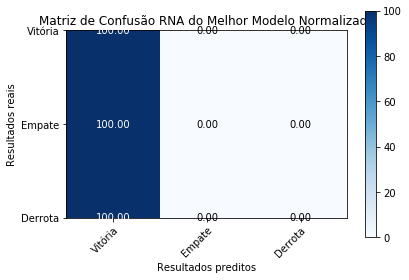

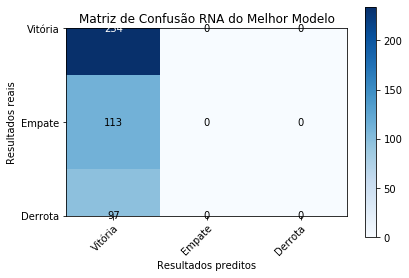

RF
Acurácia média = 0.5901
Melhor acúracia = 0.6171
[[87.18  5.56  7.26]
 [62.83 17.7  19.47]
 [29.9  18.56 51.55]]
[[204  13  17]
 [ 71  20  22]
 [ 29  18  50]]


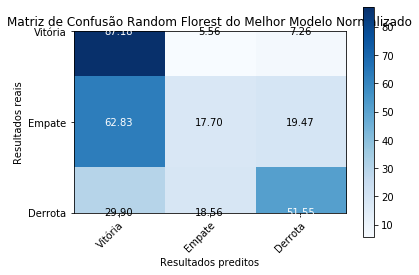

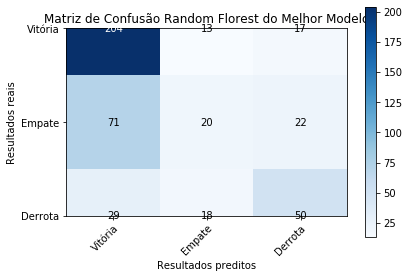

SVC
Acurácia média = 0.5993
Melhor acúracia = 0.6239
[[90.6   4.7   4.7 ]
 [65.49 14.16 20.35]
 [42.27  7.22 50.52]]
[[212  11  11]
 [ 74  16  23]
 [ 41   7  49]]


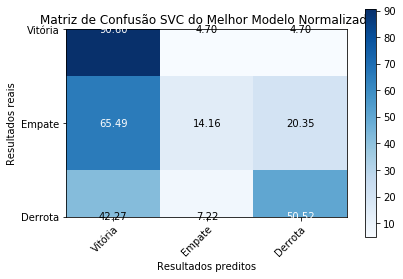

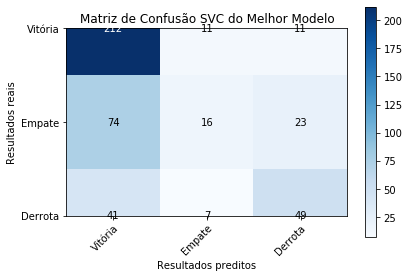

NB
Acurácia média = 0.5669
Melhor acúracia = 0.5901
[[78.21  6.84 14.96]
 [59.29  7.96 32.74]
 [23.71  4.12 72.16]]
[[183  16  35]
 [ 67   9  37]
 [ 23   4  70]]


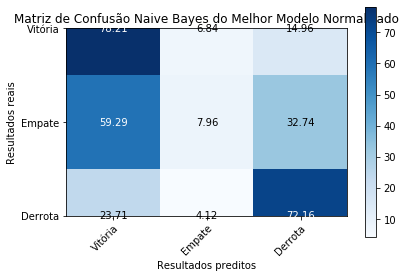

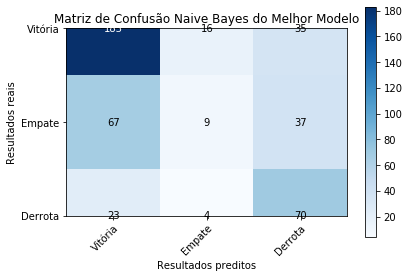

In [9]:
print("RNA")
print("Acurácia média = "+str(round(somatorioDeAcuraciasMLP/numeroDeTestes,4)))
modelosMLP = modelosMLP.sort_values(by=['acuracia'], ascending=False)
print("Melhor acúracia = "+str(round(modelosMLP.iloc[0]['acuracia'],4)))
plot_confusion_matrix(modelosMLP.iloc[0]['classesTeste'], modelosMLP.iloc[0]['classesPreditas'], classes=[1,0,-1],
                      title='Matriz de Confusão RNA do Melhor Modelo Normalizado')
plot_confusion_matrix(modelosMLP.iloc[0]['classesTeste'], modelosMLP.iloc[0]['classesPreditas'], classes=[1,0,-1],
                      title='Matriz de Confusão RNA do Melhor Modelo', normalize=False)
plt.show()

print("RF")
print("Acurácia média = "+str(round(somatorioDeAcuraciasRF/numeroDeTestes,4)))
modelosRF = modelosRF.sort_values(by=['acuracia'], ascending=False)
print("Melhor acúracia = "+str(round(modelosRF.iloc[0]['acuracia'],4)))
plot_confusion_matrix(modelosRF.iloc[0]['classesTeste'], modelosRF.iloc[0]['classesPreditas'], classes=[1,0,-1],
                      title='Matriz de Confusão Random Florest do Melhor Modelo Normalizado')
plot_confusion_matrix(modelosRF.iloc[0]['classesTeste'], modelosRF.iloc[0]['classesPreditas'], classes=[1,0,-1],
                      title='Matriz de Confusão Random Florest do Melhor Modelo',normalize=False)
plt.show()

print("SVC")
print("Acurácia média = "+str(round(somatorioDeAcuraciasSVM/numeroDeTestes,4)))
modelosSVM = modelosSVM.sort_values(by=['acuracia'], ascending=False)
print("Melhor acúracia = "+str(round(modelosSVM.iloc[0]['acuracia'],4)))
plot_confusion_matrix(modelosSVM.iloc[0]['classesTeste'], modelosSVM.iloc[0]['classesPreditas'], classes=[1,0,-1],
                      title='Matriz de Confusão SVC do Melhor Modelo Normalizado')
plot_confusion_matrix(modelosSVM.iloc[0]['classesTeste'], modelosSVM.iloc[0]['classesPreditas'], classes=[1,0,-1],
                      title='Matriz de Confusão SVC do Melhor Modelo', normalize=False)
plt.show()

print("NB")
print("Acurácia média = "+str(round(somatorioDeAcuraciasNB/numeroDeTestes,4)))
modelosNB = modelosNB.sort_values(by=['acuracia'], ascending=False)
print("Melhor acúracia = "+str(round(modelosNB.iloc[0]['acuracia'],4)))
plot_confusion_matrix(modelosNB.iloc[0]['classesTeste'], modelosNB.iloc[0]['classesPreditas'], classes=[1,0,-1],
                      title='Matriz de Confusão Naive Bayes do Melhor Modelo Normalizado')
plot_confusion_matrix(modelosNB.iloc[0]['classesTeste'], modelosNB.iloc[0]['classesPreditas'], classes=[1,0,-1],
                      title='Matriz de Confusão Naive Bayes do Melhor Modelo',normalize=False)
plt.show()

In [10]:
modelosMLP

,acuracia,classesPreditas,classesTeste
0,0.527,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, ..."
0,0.527,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, -1, -1, 1, -..."
0,0.527,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
0,0.527,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 0, -1, 1, 1, 1, 1, 0, -1, 0, -1, 1, ..."
0,0.527,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, -1, 1, 1..."
0,0.527,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, -1, -1, 1, 1, 1, 0, -1, 0, -1, 1, 1, 1, -1..."
0,0.527,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 1, -1, 0, 1, 1, 1, 1, 1, 1, -1, 1, 1..."
0,0.527,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, -1, -1, 0, -1, 1, 1, 0, 1, 1, -1, 1, 0,..."
0,0.527,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 0, 1, 0, 1, 1, 1, 1, -1, 0, 1, 1, -1, 1..."
0,0.527,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, -1, 1, -1, 1..."


In [11]:
modelosRF

,acuracia,classesPreditas,classesTeste
0,0.6171,"[1, 0, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1...","[0, 0, 1, 1, -1, 0, 1, 1, 1, 1, 1, 1, -1, 1, 1..."
0,0.6081,"[1, 1, 1, 0, 0, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1...","[1, 1, 1, 0, -1, 1, 1, 1, 1, 0, -1, 0, -1, 1, ..."
0,0.6036,"[1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1,...","[1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, -1, 1, -1, 1..."
0,0.5946,"[-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,...","[-1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, -1, 1, 1..."
0,0.5923,"[-1, -1, -1, 1, 0, 1, 1, -1, -1, 1, 1, 1, 1, 1...","[0, -1, -1, 1, 1, 1, 0, -1, 0, -1, 1, 1, 1, -1..."
0,0.5878,"[1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1,...","[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, -1, -1, 1, -..."
0,0.5878,"[1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1...","[0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
0,0.5811,"[1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, ...","[1, 1, -1, -1, 0, -1, 1, 1, 0, 1, 1, -1, 1, 0,..."
0,0.5698,"[1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, -1, 1,...","[1, 1, 0, 1, 0, 1, 1, 1, 1, -1, 0, 1, 1, -1, 1..."
0,0.5586,"[1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, -1, 0, -1, -...","[1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, ..."


In [12]:
modelosSVM

,acuracia,classesPreditas,classesTeste
0,0.6239,"[0, -1, 0, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, ...","[0, -1, -1, 1, 1, 1, 0, -1, 0, -1, 1, 1, 1, -1..."
0,0.6059,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1,...","[0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
0,0.6059,"[1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1...","[1, 1, 1, 0, -1, 1, 1, 1, 1, 0, -1, 0, -1, 1, ..."
0,0.5991,"[1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 0, -1, ...","[1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, ..."
0,0.5991,"[1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,...","[1, 1, 0, 1, 0, 1, 1, 1, 1, -1, 0, 1, 1, -1, 1..."
0,0.5968,"[1, 1, 1, 1, -1, 0, 1, 1, 1, 1, -1, -1, 1, -1,...","[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, -1, -1, 1, -..."
0,0.5968,"[1, 0, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1...","[1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, -1, 1, -1, 1..."
0,0.5923,"[-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,...","[-1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, -1, 1, 1..."
0,0.5923,"[1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 1, -1, 0, 1, 1, 1, 1, 1, 1, -1, 1, 1..."
0,0.5811,"[1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 0, -1, 0, ...","[1, 1, -1, -1, 0, -1, 1, 1, 0, 1, 1, -1, 1, 0,..."


In [13]:
modelosNB

,acuracia,classesPreditas,classesTeste
0,0.5901,"[1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1...","[0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
0,0.5878,"[1, 1, 1, -1, -1, 1, 0, -1, 1, -1, -1, 1, 1, 1...","[1, 1, 1, 0, -1, 1, 1, 1, 1, 0, -1, 0, -1, 1, ..."
0,0.5856,"[0, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1,...","[-1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, -1, 1, 1..."
0,0.5743,"[-1, -1, 1, 1, 1, -1, 1, -1, 0, -1, 1, 1, 1, 1...","[0, 0, 1, 1, -1, 0, 1, 1, 1, 1, 1, 1, -1, 1, 1..."
0,0.5676,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, -1, -1, 0...","[1, 1, -1, -1, 0, -1, 1, 1, 0, 1, 1, -1, 1, 0,..."
0,0.5586,"[-1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -...","[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, -1, -1, 1, -..."
0,0.5563,"[1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, ...","[1, 1, 0, 1, 0, 1, 1, 1, 1, -1, 0, 1, 1, -1, 1..."
0,0.5541,"[1, 0, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1,...","[1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, ..."
0,0.5518,"[-1, -1, 0, 1, 0, 1, 1, -1, -1, 1, -1, -1, 1, ...","[0, -1, -1, 1, 1, 1, 0, -1, 0, -1, 1, 1, 1, -1..."
0,0.5428,"[1, -1, -1, -1, 1, 0, 1, 1, 1, 1, 1, 1, 1, -1,...","[1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, -1, 1, -1, 1..."


In [14]:
partidas.query('resultado == 0').shape

(376, 17)

In [15]:
partidas.query('resultado == 1').shape

(778, 17)

In [16]:
partidas.query('resultado == -1').shape

(323, 17)